In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
sns.set_style('whitegrid')
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv(r'C:\Users\srini\Relating-Social-Media-to-Stock-Movement\all_stocks_5yr.csv')
df.head(7)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL


In [3]:
pd.Series(df['Name'].unique()).count() #Total uniuqe names are 505 

505

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


(619040, 7)

In [5]:
df.isnull().sum(axis=0)         #null is less, so droping row wise.

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)
df.shape

(619029, 7)

In [7]:
df.isnull().sum(axis=0)       #null removed

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [8]:
pd.Series(df['Name'].unique()).count()

505

In [9]:
df['date'].dtype  #dtype is object.

dtype('O')

In [10]:
df['date_formated'] = pd.to_datetime(df['date'], format="%Y/%m/%d") #changing the data_type to <M8[ns]

In [11]:
df.drop('date',axis=1, inplace=True)

In [12]:
df['date_formated'].dtype

dtype('<M8[ns]')

In [13]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [14]:
df = df.reindex(columns=['date_formated','Name','open','high','low','close','volume'])
df.head()

,date_formated,Name,open,high,low,close,volume
0,2013-02-08,AAL,15.07,15.12,14.63,14.75,8407500
1,2013-02-11,AAL,14.89,15.01,14.26,14.46,8882000
2,2013-02-12,AAL,14.45,14.51,14.10,14.27,8126000
3,2013-02-13,AAL,14.30,14.94,14.25,14.66,10259500
4,2013-02-14,AAL,14.94,14.96,13.16,13.99,31879900


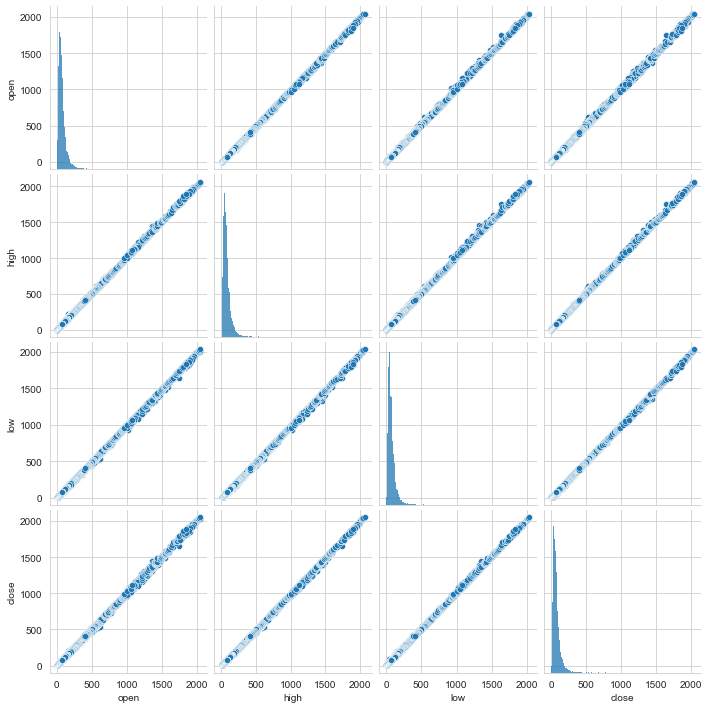

In [15]:
sns.pairplot(df.drop('volume', axis=1))

In [16]:
#Yearly mean of low col. year is extracted from date 

result = df.groupby(df.date_formated.dt.year)['low'].mean()
def low():
    yr = []
    rd = []
    for year, records in result.items():
        yr.append(year)
        rd.append(records)
    re = dict(zip(yr,rd))
    return re

lo = low()

df_low = pd.DataFrame(lo, index=['Low_mean']).transpose()
df_low

,Low_mean
2013,63.768605
2014,76.267191
2015,83.276098
2016,84.369887
2017,97.981006
2018,110.048988


In [17]:
#Yearly mean of high col.

result = df.groupby(df.date_formated.dt.year)['high'].mean()
def high():
    yr = []
    rd = []
    for year, records in result.items():
        yr.append(year)
        rd.append(records)
    re = dict(zip(yr,rd))
    return re

hg = high()

df_high  = pd.DataFrame(hg, index=['High_mean']).transpose()
df_high

,High_mean
2013,64.913807
2014,77.647126
2015,84.951007
2016,86.057550
2017,99.555482
2018,112.491921


In [18]:
#Yearly mean of open col.

result = df.groupby(df.date_formated.dt.year)['open'].mean()
def open():
    yr = []
    rd = []
    for year, records in result.items():
        yr.append(year)
        rd.append(records)
    re = dict(zip(yr,rd))
    return re

op = open()

df_open = pd.DataFrame(op, index=['Open_mean']).transpose()
df_open

,Open_mean
2013,64.333983
2014,76.965995
2015,84.133849
2016,85.214264
2017,98.777123
2018,111.250128


In [19]:
#Yearly mean of close col.

result = df.groupby(df.date_formated.dt.year)['close'].mean()
def close():
    yr = []
    rd = []
    for year, records in result.items():
        yr.append(year)
        rd.append(records)
    re = dict(zip(yr,rd))
    return re

cl = close()

df_cl = pd.DataFrame(cl, index=['Close_mean']).transpose()
df_close = df_cl
df_close

,Close_mean
2013,64.368619
2014,76.969836
2015,84.131558
2016,85.253965
2017,98.800548
2018,111.287631


In [20]:
df_high.iplot(kind='bar', title='Mean of High for every year', color='red')
df_low.iplot(kind='bar', title='Mean of Low for every year', color='blue')
df_open.iplot(kind='bar', title='Mean of Open for every year', color='green')
df_close.iplot(kind='bar', title='Mean of Close for every year')

In [21]:
#volume of every stock by year basis
result = df.groupby(df.date_formated.dt.year)['volume'].mean()
def volume():
    yr = []
    rd = []
    for year, records in result.items():
        yr.append(year)
        rd.append(records)
    re = dict(zip(yr,rd))
    return re

vo = volume()

df_volume = pd.DataFrame(vo, index=df['Name'].unique())
df_volume

,2013,2014,2015,2016,2017,2018
AAL,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
AAPL,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
AAP,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
ABBV,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
ABC,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
...,...,...,...,...,...,...
XYL,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
YUM,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
ZBH,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
ZION,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06


In [22]:
top_stock_2013 = df_volume[2013].nlargest(10)
top_stock_2014 = df_volume[2014].nlargest(10)
top_stock_2015 = df_volume[2015].nlargest(10)
top_stock_2016 = df_volume[2016].nlargest(10)
top_stock_2017 = df_volume[2017].nlargest(10)
top_stock_2018 = df_volume[2018].nlargest(10)

In [23]:
df_top_stock_2013 = pd.DataFrame(top_stock_2013)
df_top_stock_2014 = pd.DataFrame(top_stock_2014)
df_top_stock_2015 = pd.DataFrame(top_stock_2015)
df_top_stock_2016 = pd.DataFrame(top_stock_2016)
df_top_stock_2017 = pd.DataFrame(top_stock_2017)
df_top_stock_2018 = pd.DataFrame(top_stock_2018)
df_top_stock_2013

,2013
AAL,4.573753e+06
AAPL,4.573753e+06
AAP,4.573753e+06
ABBV,4.573753e+06
ABC,4.573753e+06
ABT,4.573753e+06
ACN,4.573753e+06
ADBE,4.573753e+06
ADI,4.573753e+06
ADM,4.573753e+06


In [24]:
df_top = df_top_stock_2013.append([df_top_stock_2014,df_top_stock_2015,
                          df_top_stock_2016,df_top_stock_2017,df_top_stock_2018])
df_top.reset_index(inplace=True)
df_top.rename(columns={'index':'Name'}, inplace=True)
df_top

,Name,2013,2014,2015,2016,2017,2018
0,AAL,4.573753e+06,NaN,NaN,NaN,NaN,NaN
1,AAPL,4.573753e+06,NaN,NaN,NaN,NaN,NaN
2,AAP,4.573753e+06,NaN,NaN,NaN,NaN,NaN
3,ABBV,4.573753e+06,NaN,NaN,NaN,NaN,NaN
4,ABC,4.573753e+06,NaN,NaN,NaN,NaN,NaN
5,ABT,4.573753e+06,NaN,NaN,NaN,NaN,NaN
6,ACN,4.573753e+06,NaN,NaN,NaN,NaN,NaN
7,ADBE,4.573753e+06,NaN,NaN,NaN,NaN,NaN
8,ADI,4.573753e+06,NaN,NaN,NaN,NaN,NaN
9,ADM,4.573753e+06,NaN,NaN,NaN,NaN,NaN


In [31]:
df_top_s = df_top.groupby('Name')
df_top_stock = df_top_s.mean()
df_top_stock.reset_index(inplace=True)
df_top_stock

,Name,2013,2014,2015,2016,2017,2018
0,AAL,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
1,AAP,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
2,AAPL,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
3,ABBV,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
4,ABC,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
5,ABT,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
6,ACN,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
7,ADBE,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
8,ADI,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06
9,ADM,4.573753e+06,4.163922e+06,4.324119e+06,4.556700e+06,3.970454e+06,4.825638e+06


<AxesSubplot:ylabel='Name'>

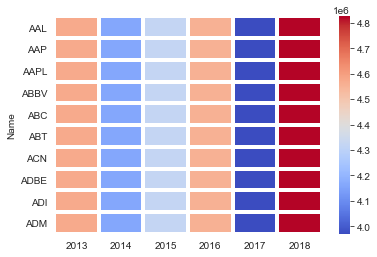

In [32]:
dc=df_top_stock.pivot_table(index='Name',values=[2013,2014,2015,2016,2017,2018])
sns.heatmap(dc, cmap='coolwarm',linecolor='white',linewidths=3)

In [33]:
#Conformation that, Graph data is valid
df_top_stock.drop(['Name'],axis=1).loc[0].sort_values()

2017    3.970454e+06
2014    4.163922e+06
2015    4.324119e+06
2016    4.556700e+06
2013    4.573753e+06
2018    4.825638e+06
Name: 0, dtype: float64